In [1]:
# Implementing Feedforward neural networks with Keras and TensorFlow
# a. Import the necessary packages
# b. Load the training and testing data (MNIST/CIFAR10)
# c. Define the network architecture using Keras
# d. Train the model using SGD
# e. Evaluate the network
# f. Plot the training loss and accuracy

## feedforward neural network
A feedforward neural network, in simple words, is a type of artificial neural network that consists of layers of interconnected nodes, or neurons. It's called "feedforward" because information flows in one direction, from the input layer through intermediate hidden layers to the output layer, without forming loops or feedback connections.

Here's how it works:

Input Layer: The network receives input data, which could be anything from numbers, images, or text.

Hidden Layers: Between the input and output layers, there can be one or more hidden layers. Each layer contains multiple neurons, and these neurons are connected to each other and to the neurons in adjacent layers. Neurons in hidden layers perform mathematical operations on the input data and pass the result to the next layer.

Output Layer: The final layer produces the network's output, which could be a prediction, classification, or any other relevant information based on the input data and the network's learned patterns.
***************************************************************
## Tensorflow
TensorFlow is a tool that helps you teach computers to learn from data and make predictions, which can be used for things like recognizing images, understanding language, or making recommendations. It's like a toolbox for building smarter computer programs.

In [2]:

# a. Import the necessary packages
import pandas as pd#used for convert  raw data into tabular format
import numpy as np# used for mathematical operations
import matplotlib.pyplot as plt #used for visulazation
import tensorflow as tf
import os
import seaborn as sns#used advanced visulazation
import keras


In [3]:
# b. Load the training and testing data (MNIST/CIFAR10)
#converting the whole dataset into 4 arrays
mnist=tf.keras.datasets.mnist
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


10000: This is the number of images in your dataset. In this case, you have 10,000 images.

28: This number represents the height of each image. Each image is 28 pixels tall.

28: This number represents the width of each image. Each image is 28 pixels wide.

In [7]:
X_train_full.shape,y_train_full.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
print(f"data type of x_train_full:{X_train_full.dtype},\n shape of X_train_full:{X_train_full.shape}")

data type of x_train_full:uint8,
 shape of X_train_full:(60000, 28, 28)


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

## Dividing the data by 255 is done to scale the pixel values of images between 0 and 1. This makes it easier for neural networks to learn from the data, as it helps with faster training and better performance. It's like adjusting the volume on a music player to a standard level before listening to different songs for better clarity and consistency.

In [11]:
# Create a validation dataset from the full training data
# Scale the data between  0 to 1 by dividing it by 255,as its an unsigned data between 0-255 range
X_valid,X_train=X_train_full[:5000]/255.,X_train_full[5000:]/255.
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

#Scale the test set as well
X_test=X_test/255.

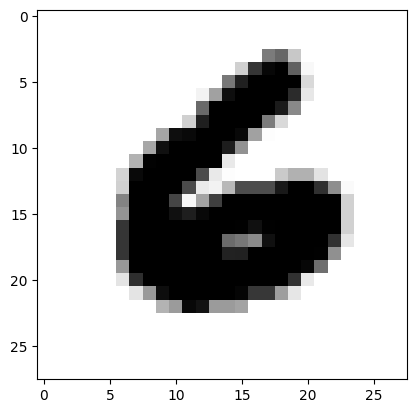

In [15]:
# Lets view some data
plt.imshow(X_train[18],cmap='binary')
plt.show()

<Axes: >

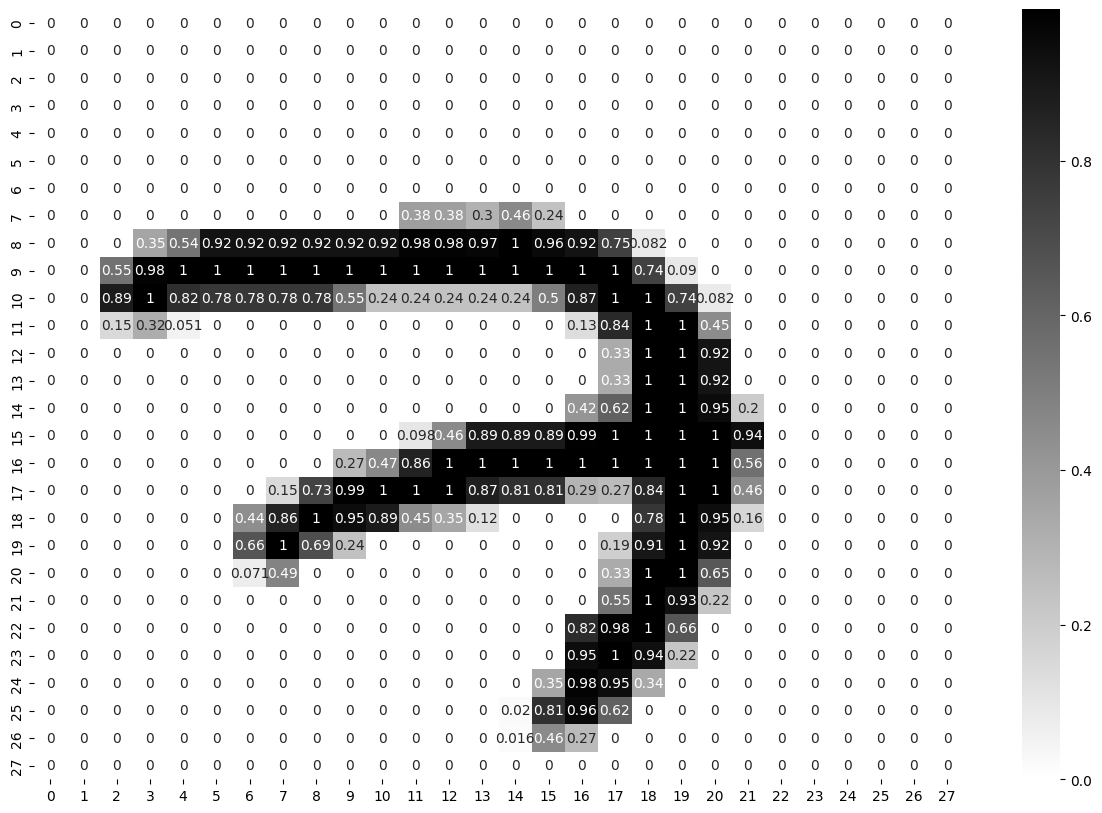

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train[0],annot=True,cmap='binary')

# Architecture Used:
<img src="https://github.com/entbappy/Branching-tutorial/blob/master/9.png?raw=true"
width="500"
height="300">

## Softmax
In simple words, the softmax activation function is used in machine learning and deep learning to turn a set of numbers into probabilities. It takes a bunch of numbers as input and transforms them in such a way that the largest number becomes close to 1, and the other numbers get smaller. This allows you to represent how likely each option is from a list of choices.
****************************************************************
## Relu
ReLU, which stands for Rectified Linear Unit, is a simple and popular activation function in neural networks. In short, it works like this:

If the input is positive, it keeps the input as it is.

If the input is negative, it turns it into zero.

So, ReLU is like a switch that turns off for negative numbers and lets positive numbers through. It's used to introduce non-linearity in the neural network and helps the network learn complex patterns and relationships in data.
************************************************************************
## Dense
In simple words, the Dense function in deep learning is like a versatile building block that allows a neural network to learn and represent patterns and relationships in data. It connects all the input elements to the output, applies non-linear transformations, and is commonly used for tasks like classification, regression, and feature learning.
*******************************************************************
## sparse_categorical_crossentropy
In simple words, sparse_categorical_crossentropy is a mathematical formula used to measure how well a machine learning model (like a neural network) is performing in tasks where you want to classify things into different categories (classification tasks).

The sparse_categorical_crossentropy is a way to calculate how close these predictions are to the actual labels (the correct answers). If the predictions are very close to the actual labels, the value of sparse_categorical_crossentropy is low. If the predictions are way off, the value is high. The goal is to train the model to minimize this value, making its predictions as accurate as possible.



In [17]:
# c. Define the network architecture using Keras
# Creating Layers of ANN

LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28],name='inputLayer'),
        tf.keras.layers.Dense(300,activation="relu",name="HiddenLayer1"),
        tf.keras.layers.Dense(100,activation="relu",name="HiddenLayer2"),
        tf.keras.layers.Dense(10,activation="softmax",name="outputlayer")]

model_clf=tf.keras.models.Sequential(LAYERS)

In [18]:
model_clf.layers

In [19]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 HiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# first Layer * second Layer + bias
784*300 + 300, 300*100+100, 100*10+10

(235500, 30100, 1010)

# SGD- It will move to each record(row) of the dataset calculate the loss function ,gradient and then it update the parameters of each row
# Loss function-Loss function is similar to cost dunction only the diffrence is it is calculated for single record..loss function is used to minimized the error and also to update the weights so the weights can reach to the global minima


In [21]:
# d. Train the model using SGD
# SGD- It will move to each record(row) of the dataset calculate the loss function ,gradient and then it update the parameters of each row
# Loss function-Loss function is similar to cost dunction only the diffrence is it is calculated for single record..loss function is used to minimized the error and also to update the weights so the weights can reach to the global minima
LOSS_FUNCTION="sparse_categorical_crossentropy"#use=>tf.losses.sparse_categorical_crossentropy
OPTIMIZER="SGD"#or use with custom learning rate=>tf.keras.optimizers.SGD(0.02)
METRICS=['accuracy']

model_clf.compile(loss=LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics=METRICS)


###If you set the number of epochs to 30 during the training of an Artificial Neural Network (ANN), it means that the network will go through your entire training dataset 30 times to learn from it and improve its predictions.


In [22]:
# training
# If you set the number of epochs to 30 during the training of an Artificial Neural Network (ANN), it means that the network will go through your entire training dataset 30 times to learn from it and improve its predictions.
EPOCHS=30
VALIDATION_SET=(X_valid,y_valid)
history=model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET,batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 11s 3ms/step - loss: 0.5992 - accuracy: 0.8480 - val_loss: 0.3120 - val_accuracy: 0.9148
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2892 - accuracy: 0.9179 - val_loss: 0.2488 - val_accuracy: 0.9318
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2383 - accuracy: 0.9321 - val_loss: 0.2041 - val_accuracy: 0.9438
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2034 - accuracy: 0.9422 - val_loss: 0.1794 - val_accuracy: 0.9502
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1772 - accuracy: 0.9494 - val_loss: 0.1626 - val_accuracy: 0.9544
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1564 - accuracy: 0.9550 - val_loss: 0.1458 - val_accuracy: 0.9614
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1394 - accuracy: 0.9607 - val_loss: 0.1336 - val_accuracy

In [23]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

# The evaluation of the model on the dataset can be done using the evaluate() function. It takes two arguments i.e, input and output. It will generate a prediction for input

In [24]:
# e. Evaluate the network
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0709 - accuracy: 0.9778


[0.07088310271501541, 0.9778000116348267]

In [25]:
y_prob=model_clf.predict(X_test)
y_prob

313/313 [==============================] - 1s 2ms/step


array([[5.25801534e-06, 1.59523083e-07, 5.92304059e-05, ...,
        9.99719679e-01, 5.14412818e-07, 2.07506255e-05],
       [4.57398119e-06, 3.42297935e-05, 9.99755323e-01, ...,
        2.91353747e-11, 3.16736623e-05, 1.68335235e-12],
       [8.94955519e-06, 9.96707022e-01, 4.24500409e-04, ...,
        1.07333134e-03, 1.15623500e-03, 2.03242580e-05],
       ...,
       [5.28636232e-11, 1.00047345e-10, 2.45209647e-12, ...,
        3.38100631e-06, 3.85558394e-07, 4.21060076e-06],
       [9.33798816e-08, 5.23022976e-08, 3.02149555e-10, ...,
        1.64201397e-09, 1.51739432e-05, 2.72978751e-10],
       [8.25444815e-08, 2.14207110e-10, 6.74709213e-07, ...,
        5.83831638e-12, 7.07162640e-09, 2.39068348e-10]], dtype=float32)

In [27]:
x_new=X_test[:3]

In [28]:
y_prob=model_clf.predict(x_new)
y_prob.round(3)

1/1 [==============================] - 0s 27ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.997, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

In [29]:
y_pred=np.argmax(y_prob,axis=-1)
y_pred

array([7, 2, 1])

In [30]:
actual=y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

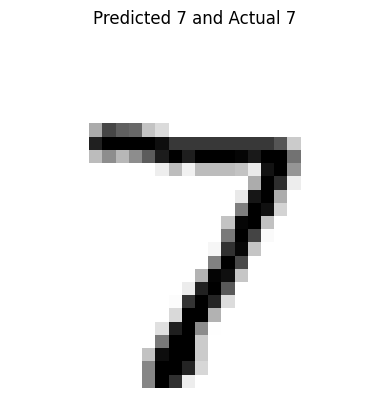

######################


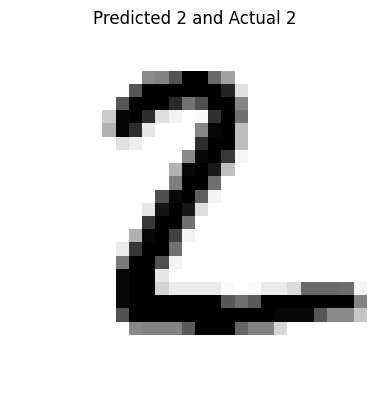

######################


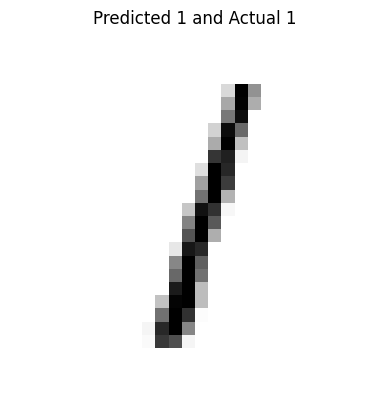

######################


In [31]:
# plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show()
  print("######################")

<Axes: >

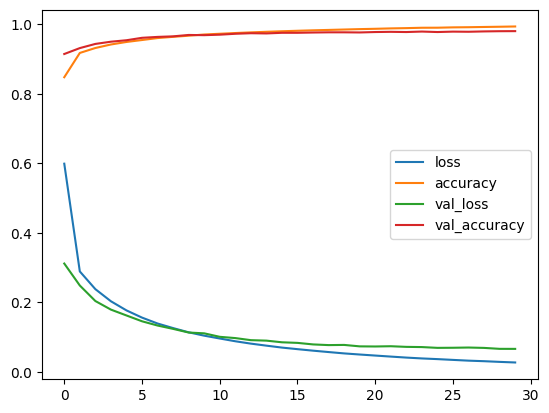

In [26]:
# f. Plot the training loss and accuracy
pd.DataFrame(history.history).plot()